## Environment Setup

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load data and create DataFrame
housing = pd.read_csv('D600_Task_1_Dataset_1_Housing_Information.csv')
housing.head().T

,0,1,2,3,4
ID,4922,5009,4450,1070,400
Price,255614.8992,155586.0947,131050.8324,151361.7125,113167.6128
SquareFootage,566.62,1472.34,550.0,941.81,550.0
NumBathrooms,1.0,1.0,1.779354,2.035254,1.064644
NumBedrooms,4,2,3,2,3
BackyardSpace,779.42,656.13,754.57,439.59,353.03
CrimeRate,20.56,15.62,12.47,22.22,8.28
SchoolRating,5.62,5.63,9.2,7.08,5.93
AgeOfHome,39.46,40.51,48.38,94.67,16.8
DistanceToCityCenter,10.08,7.89,23.74,5.22,43.13


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

In [4]:
# Data Cleaning

# Map fireplace values: 'No': 0, 'Yes': 1
housing['Fireplace'] = housing['Fireplace'].map({'No': 0, 'Yes': 1})

# Map garage values: 'No': 0, 'Yes': 1
housing['Garage'] = housing['Garage'].map({'No': 0, 'Yes': 1})

# Change data type of 'Fireplace' and 'Garage' to integer
housing['Fireplace'] = housing['Fireplace'].astype(int)
housing['Garage'] = housing['Garage'].astype(int)

# Drop 'HouseColor' column as it should have no predictive power on 'Price'
housing.drop('HouseColor', axis=1, inplace=True)

housing.head().T

,0,1,2,3,4
ID,4922.0000,5009.00000,4450.000000,1070.000000,400.000000
Price,255614.8992,155586.09470,131050.832400,151361.712500,113167.612800
SquareFootage,566.6200,1472.34000,550.000000,941.810000,550.000000
NumBathrooms,1.0000,1.00000,1.779354,2.035254,1.064644
NumBedrooms,4.0000,2.00000,3.000000,2.000000,3.000000
BackyardSpace,779.4200,656.13000,754.570000,439.590000,353.030000
CrimeRate,20.5600,15.62000,12.470000,22.220000,8.280000
SchoolRating,5.6200,5.63000,9.200000,7.080000,5.930000
AgeOfHome,39.4600,40.51000,48.380000,94.670000,16.800000
DistanceToCityCenter,10.0800,7.89000,23.740000,5.220000,43.130000


## C1. Variable Identification

In [5]:
# Independent variable: 'Price'
# Dependent variables: 'SquareFootage', 'NumBathrooms', 'NumBedrooms',
# 'PreviousSalePrice'
var_cols = ['Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 'PreviousSalePrice']
var_cols

['Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 'PreviousSalePrice']

## C2. Descriptive Statistics

In [6]:
# Descriptive Statistics of chosen variables
housing_demo = housing[var_cols].describe()
housing_demo

,Price,SquareFootage,NumBathrooms,NumBedrooms,PreviousSalePrice
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7.000000e+03
mean,3.072820e+05,1048.947459,2.131397,3.008571,2.845094e+05
std,1.501734e+05,426.010482,0.952561,1.021940,1.857340e+05
min,8.500000e+04,550.000000,1.000000,1.000000,-8.356902e+03
25%,1.921075e+05,660.815000,1.290539,2.000000,1.420140e+05
50%,2.793230e+05,996.320000,1.997774,3.000000,2.621831e+05
75%,3.918781e+05,1342.292500,2.763997,4.000000,3.961212e+05
max,1.046676e+06,2874.700000,5.807239,7.000000,1.296607e+06


## C3. Visualizations

### Univariate Visualizations

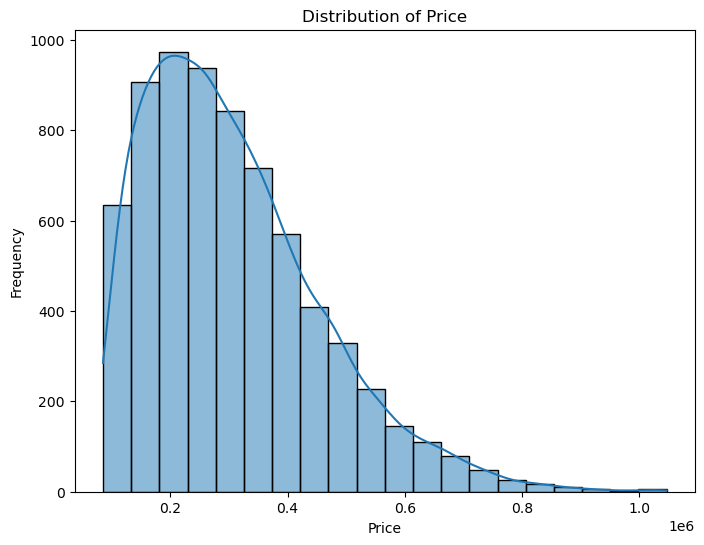

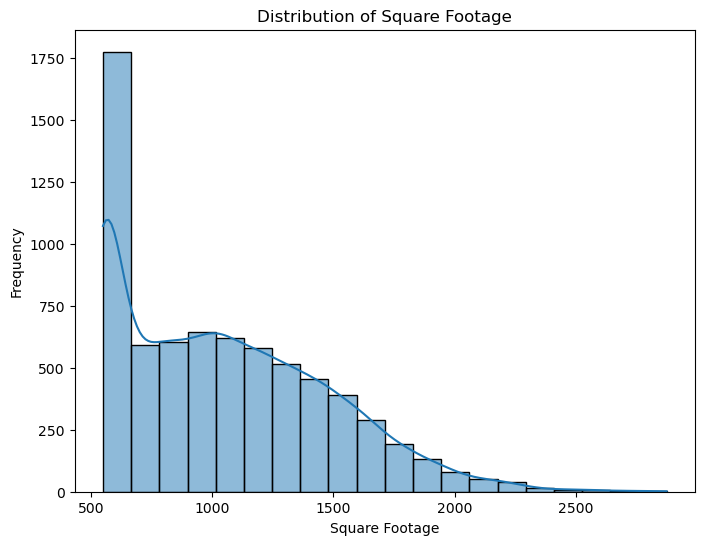

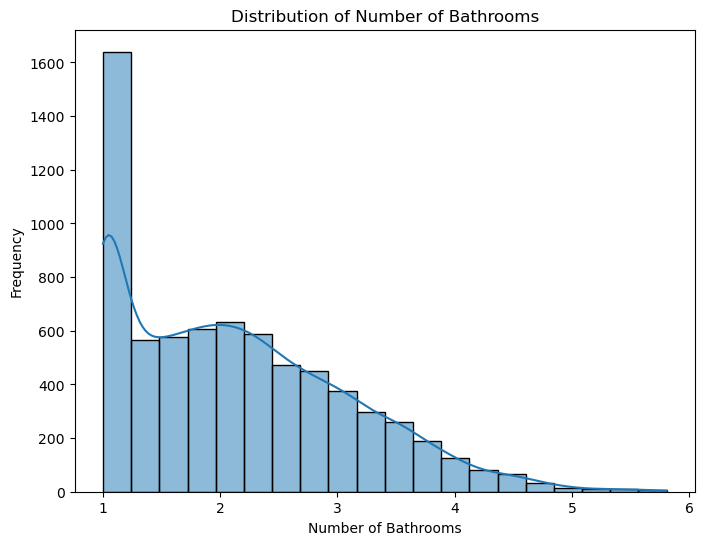

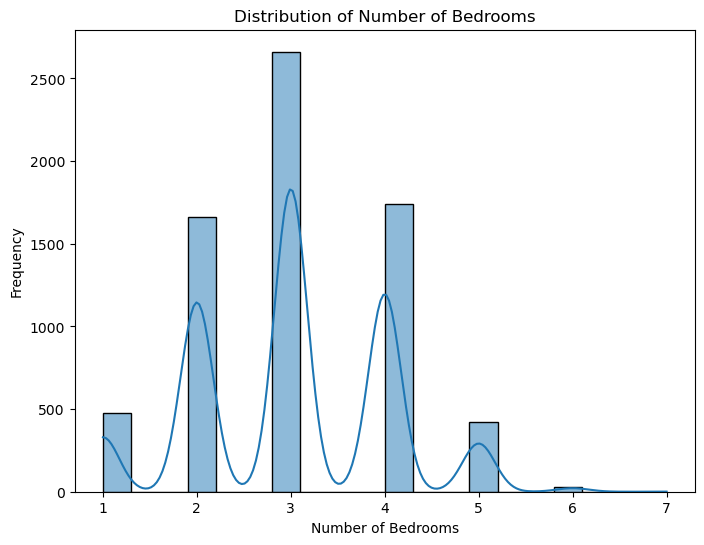

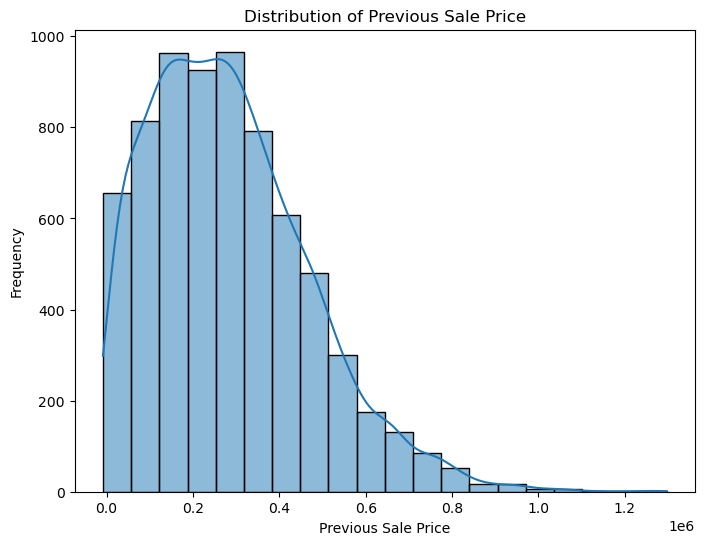

In [7]:
# UNIVARIATE VISUALIZATIONS
# Histogram of 'Price' Distribution
plt.figure(figsize=(8, 6))
sns.histplot(housing['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Histogram of 'SquareFootage' distribution
plt.figure(figsize=(8, 6))
sns.histplot(housing['SquareFootage'], bins=20, kde=True)
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.show()

# Histogram of 'NumBathrooms' distribution
plt.figure(figsize=(8, 6))
sns.histplot(housing['NumBathrooms'], bins=20, kde=True)
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.show()

# Histogram of 'NumBedrooms' distribution
plt.figure(figsize=(8, 6))
sns.histplot(housing['NumBedrooms'], bins=20, kde=True)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

# Histogram of 'PreviousSalesPrice' distribution
plt.figure(figsize=(8, 6))
sns.histplot(housing['PreviousSalePrice'], bins=20, kde=True)
plt.title('Distribution of Previous Sale Price')
plt.xlabel('Previous Sale Price')
plt.ylabel('Frequency')
plt.show()

### Bivariate Visualizations

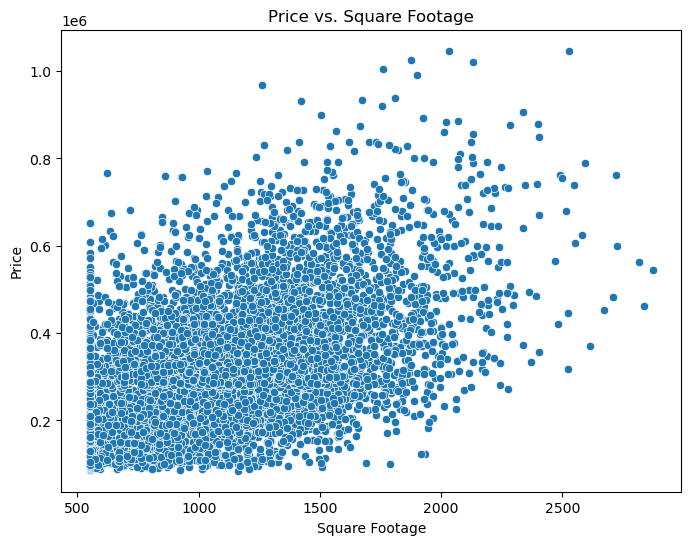

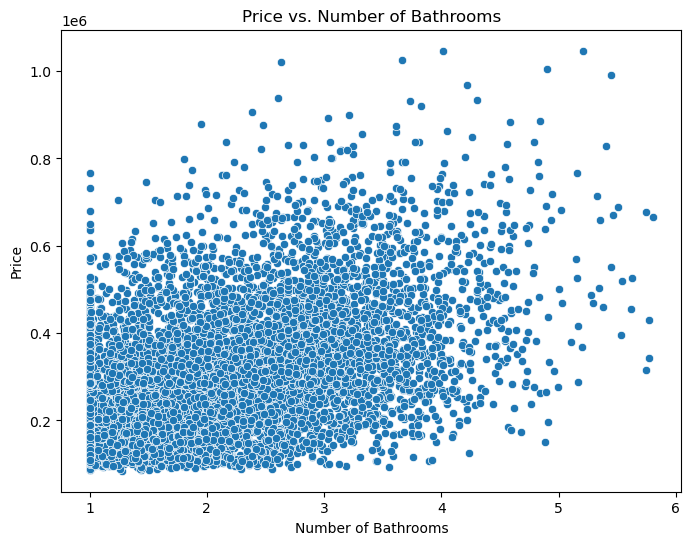

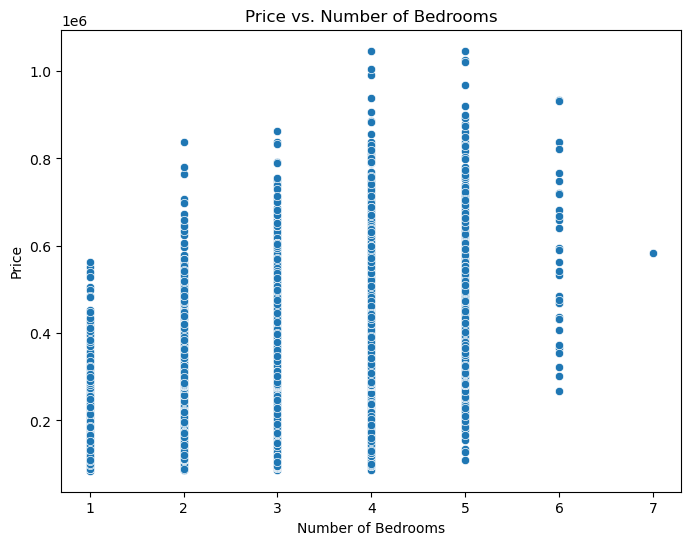

Text(0, 0.5, 'Price')

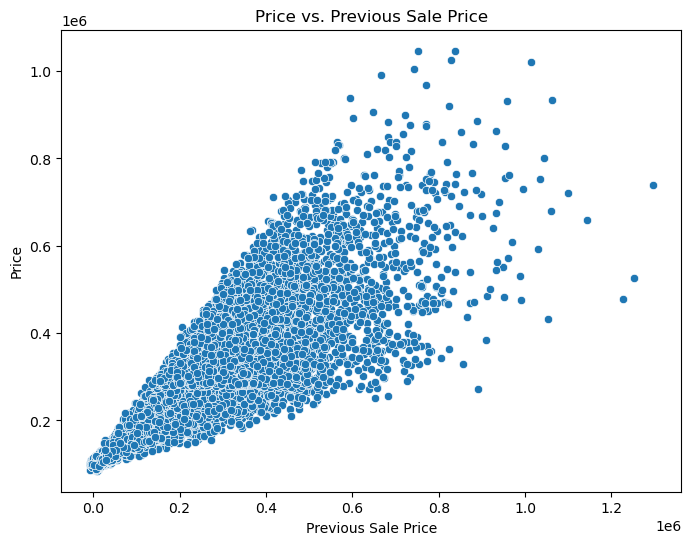

In [8]:
# BIVARIATE VISUALIZATIONS
# Scatter plot showing 'Price' vs. 'SquareFootage'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing, x='SquareFootage', y='Price')
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

# Scatter plot showing 'Price' vs. 'NumBathrooms'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing, x='NumBathrooms', y='Price')
plt.title('Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

# Scatter plot showing 'Price' vs. 'NumBedrooms'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing, x='NumBedrooms', y='Price')
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Scatter plot showing 'Price' vs. 'PreviousSalePrice'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing, x='PreviousSalePrice', y='Price')
plt.title('Price vs. Previous Sale Price')
plt.xlabel('Previous Sale Price')
plt.ylabel('Price')

<Axes: >

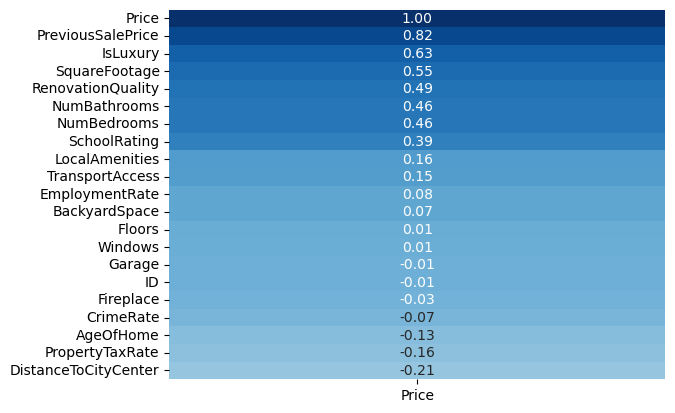

In [9]:
# Create a correlation heatmap of the variables against 'Price'
# (McCoy 2024)
sns.heatmap(data=housing.corr()[['Price']].sort_values(by='Price', ascending=False),
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')